# CO2 Emissions


![my image caption](img.jpg)

Analysis: Aleksey Schukin

https://www.linkedin.com/in/aleksey-schukin/


## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [146]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# Preview the dataframe
cars.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


# Part 1: Familiarity with the data


Let's start the narration of our story with standard procedures with data. I like the way the code looks to check for gaps in the data, the result of its execution makes it possible to perfectly evaluate everything that happens to the data

In [147]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(10, 14), title='% of NaN (from {} lines)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=25)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=5, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=3, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

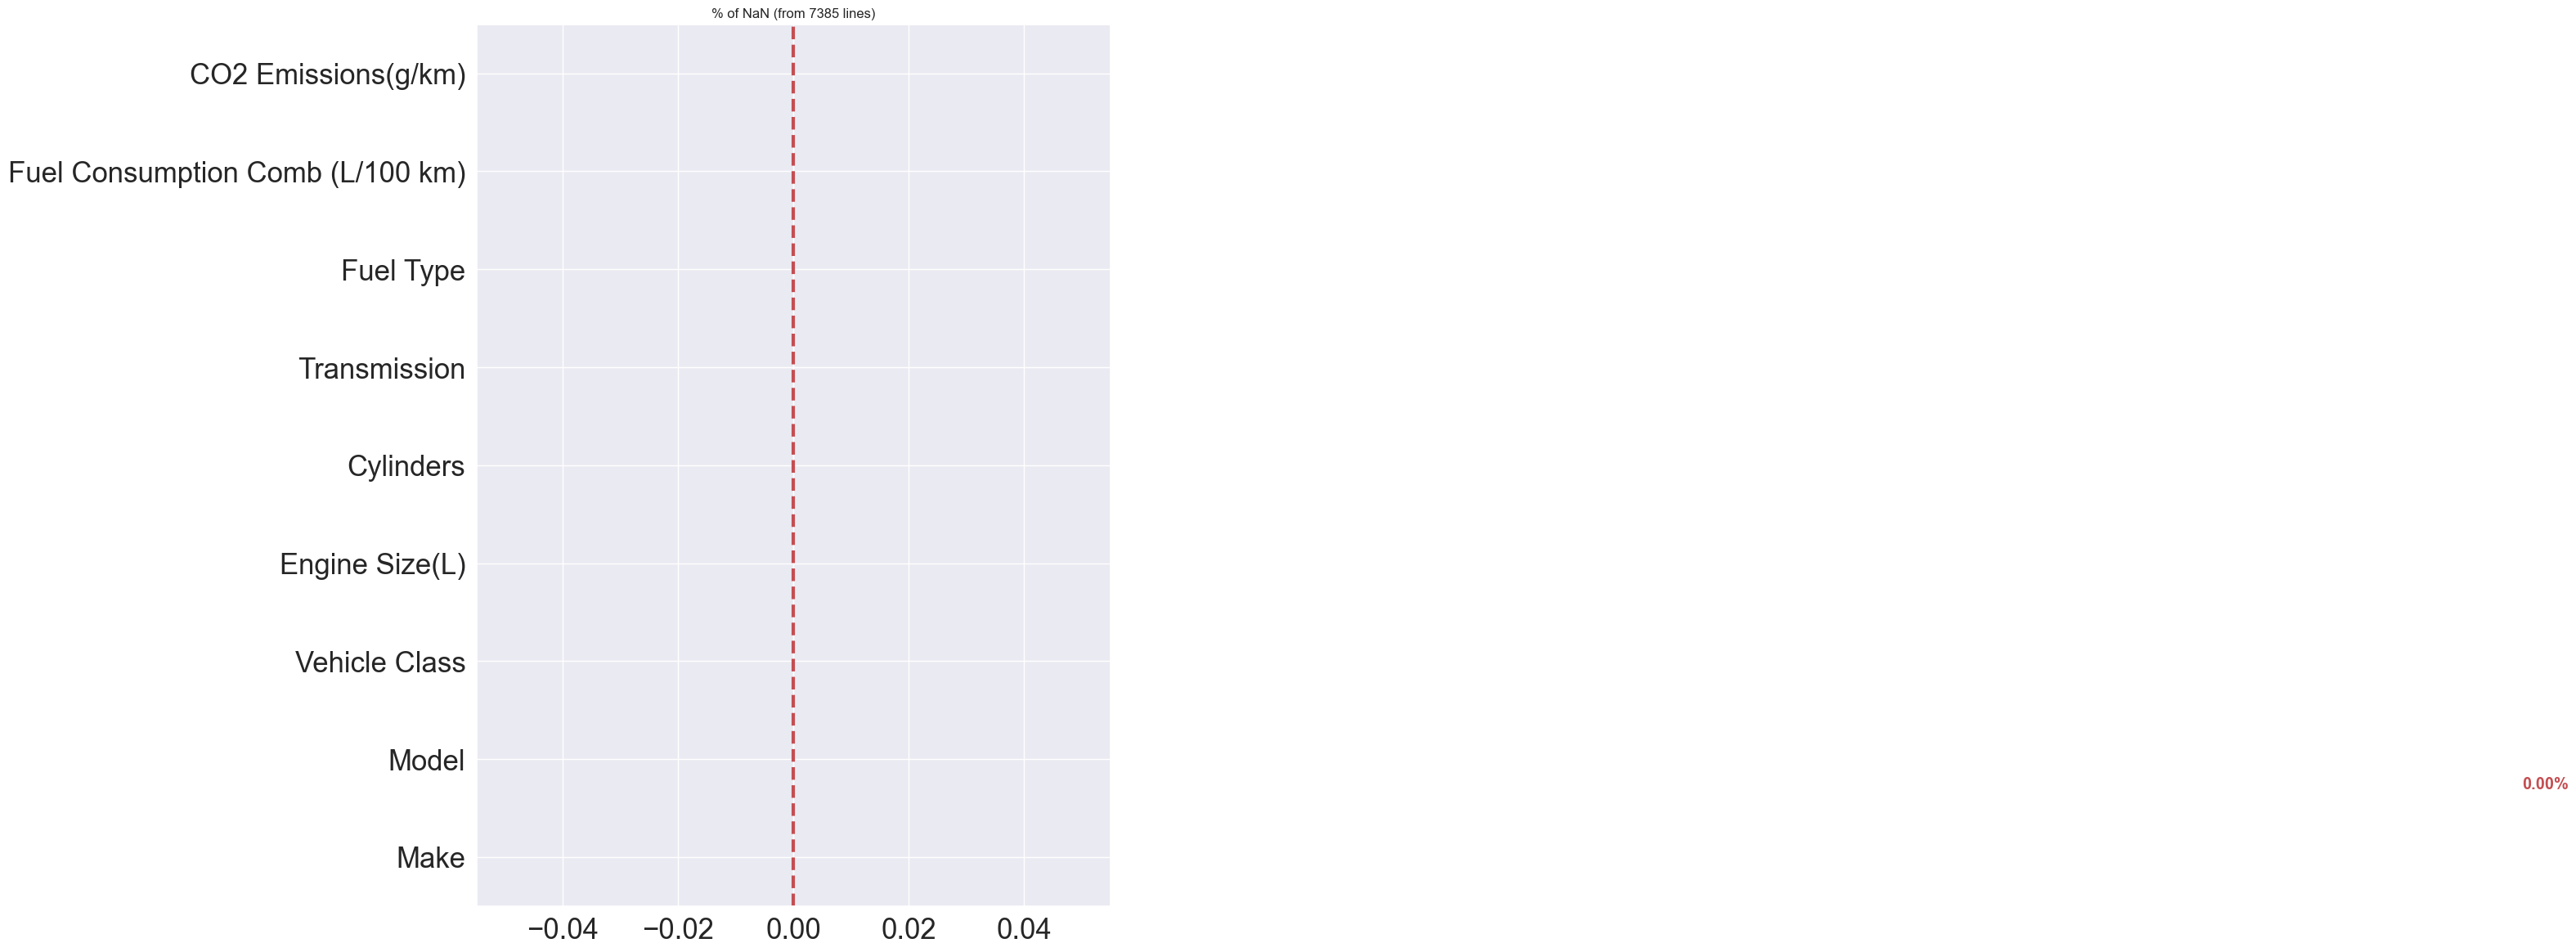

In [148]:
plot, threshold = percent_hbar(cars)


In [149]:
cars.columns = cars.columns.map(lambda x: x.replace(" ", "_"))
cars.columns = cars.columns.map(lambda x: x.lower())
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   make                              7385 non-null   object 
 1   model                             7385 non-null   object 
 2   vehicle_class                     7385 non-null   object 
 3   engine_size(l)                    7385 non-null   float64
 4   cylinders                         7385 non-null   int64  
 5   transmission                      7385 non-null   object 
 6   fuel_type                         7385 non-null   object 
 7   fuel_consumption_comb_(l/100_km)  7385 non-null   float64
 8   co2_emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [150]:
cars['fuel_type'] = cars['fuel_type'].replace("X", "Regular")
cars['fuel_type'] = cars['fuel_type'].replace("Z", "Premium")
cars['fuel_type'] = cars['fuel_type'].replace("D", "Diesel")
cars['fuel_type'] = cars['fuel_type'].replace("E", "Ethanol")
cars['fuel_type'] = cars['fuel_type'].replace("N", "Gas")


In [151]:
cars.describe()

,engine_size(l),cylinders,fuel_consumption_comb_(l/100_km),co2_emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


In [152]:
cars['model'] =cars.model.apply(lambda x: x.lower())
cars['make'] =cars.make.apply(lambda x: x.lower())
cars['vehicle_class'] =cars.vehicle_class.apply(lambda x: x.lower())
cars['transmission'] =cars.transmission.apply(lambda x: x.lower())


In [153]:
cars[cars.duplicated()]

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_comb_(l/100_km),co2_emissions(g/km)
1075,acura,rdx awd,suv - small,3.5,6,as6,Premium,10.6,244
1076,acura,rlx,mid-size,3.5,6,as6,Premium,10.0,230
1081,alfa romeo,4c,two-seater,1.8,4,am6,Premium,8.4,193
1082,aston martin,db9,minicompact,5.9,12,a6,Premium,15.6,359
1084,aston martin,v8 vantage,two-seater,4.7,8,am7,Premium,14.7,338
...,...,...,...,...,...,...,...,...,...
7365,volkswagen,golf gti,compact,2.0,4,m6,Regular,8.7,203
7366,volkswagen,jetta,compact,1.4,4,as8,Regular,7.0,162
7367,volkswagen,jetta,compact,1.4,4,m6,Regular,7.0,163
7368,volkswagen,jetta gli,compact,2.0,4,am7,Regular,8.4,196


In [154]:
cars.drop_duplicates(inplace = True)

In [155]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(cars.columns):
    variables.loc[i] = [var, cars[var].nunique(), cars[var].unique().tolist()]
variables.set_index('Variable', inplace=True)    
variables

,Number of unique values,Values
Variable,,
make,42,"[acura, alfa romeo, aston martin, audi, bentle..."
model,1596,"[ilx, ilx hybrid, mdx 4wd, rdx awd, rlx, tl, t..."
vehicle_class,16,"[compact, suv - small, mid-size, two-seater, m..."
engine_size(l),51,"[2.0, 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3.0, ..."
cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]"
transmission,27,"[as5, m6, av7, as6, am6, a6, am7, av8, as8, a7..."
fuel_type,5,"[Premium, Diesel, Regular, Ethanol, Gas]"
fuel_consumption_comb_(l/100_km),181,"[8.5, 9.6, 5.9, 11.1, 10.6, 10.0, 10.1, 11.6, ..."
co2_emissions(g/km),331,"[196, 221, 136, 255, 244, 230, 232, 267, 212, ..."


At first glance , the data is clean and without missing values . In the course of answering the questions of reviewing this data, if we have missed something, we will definitely understand it


# Part 2: Exploratory Data Analysis

## We will answer the questions posed in this case study

## 1. What is the average engine capacity in liters ?

In [156]:
mean_V_per_L = cars['engine_size(l)'].mean().round(1)
median_V_per_L = cars['engine_size(l)'].median().round(1)

print('The mean engine size in liter = {}'.format(mean_V_per_L))
print('The median engine size in liter = {}'.format(median_V_per_L))

The mean engine size in liter = 3.2
The median engine size in liter = 3.0


### As we can see , the average engine capacity of 5749 cars is more than 3 liters !

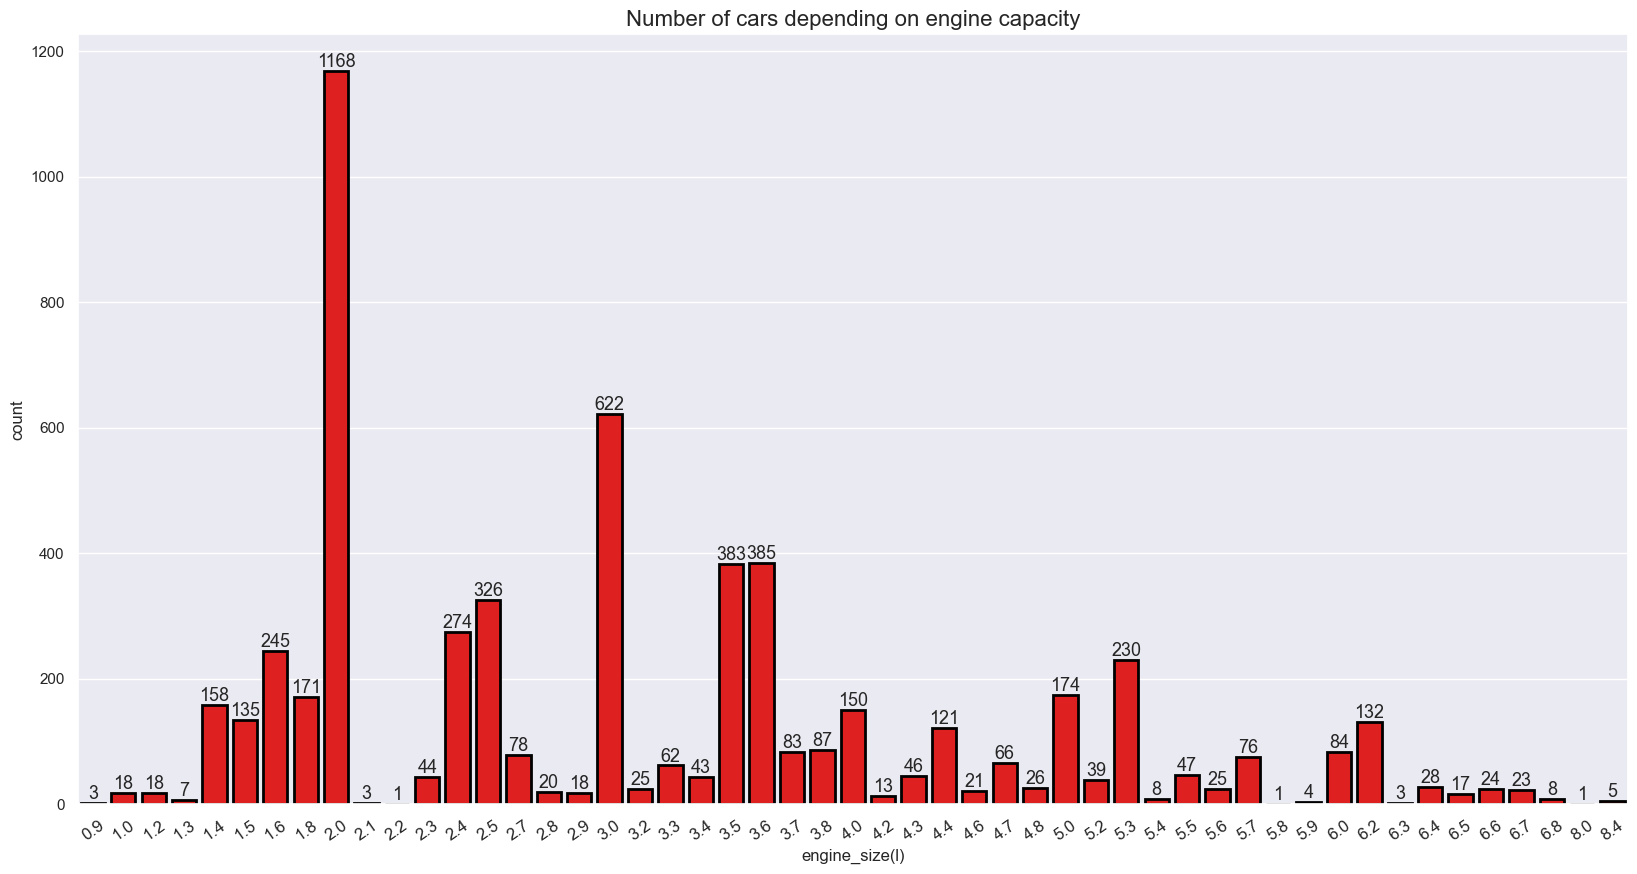

In [157]:
df = cars.groupby('engine_size(l)').agg({'count'}).cylinders.reset_index()

plt.figure(figsize=(20, 10))
plt.title('Number of cars depending on engine capacity',fontsize=16)
plt.xticks(rotation=35, fontsize=12);

ax = sns.barplot(data = df, x = 'engine_size(l)', y ='count', color ='red',edgecolor='black',linewidth=2)


patch_h = [patch.get_height() for patch in ax.patches]

for i in ax.patches:
    plt.annotate(format(i.get_height(),".0f"), xy=(i.get_x() + i.get_width() / 2,
                                          i.get_height()),ha='center',va='bottom',rotation=0,fontsize = 13)

As we can see, although 3.2 liters is the average engine capacity of our dataframe, but the class itself is represented by a fairly small number of cars

## 2. What is the average fuel consumption for regular gasoline?

In [158]:
mean_fuel = cars.groupby(['fuel_type'])\
				.agg({'fuel_consumption_comb_(l/100_km)':'mean'})\
			    .reset_index().round(2)\
                .sort_values('fuel_consumption_comb_(l/100_km)',ascending= False)


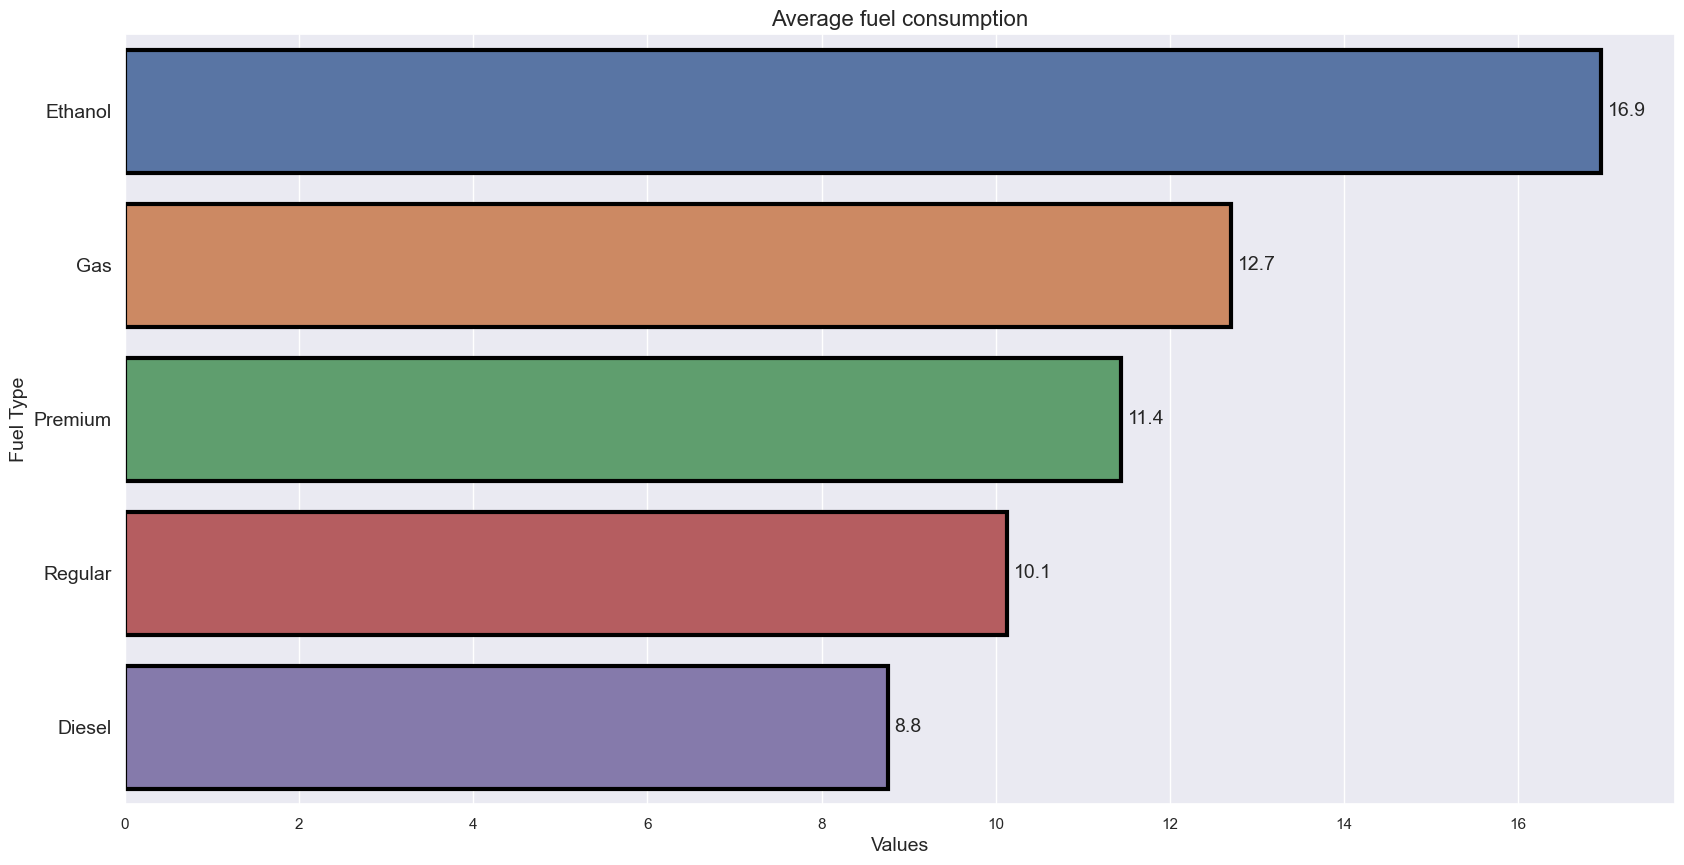

In [159]:
values = list(mean_fuel['fuel_consumption_comb_(l/100_km)'])
y_labels =  list(mean_fuel['fuel_type'])
plt.figure(figsize=(20,10))

ax = sns.barplot(data = mean_fuel,y = 'fuel_type', x ='fuel_consumption_comb_(l/100_km)' ,edgecolor='black',linewidth=3);

ax.set_title('Average fuel consumption',fontsize = 16)
ax.set_xlabel('Values',fontsize = 14)
ax.set_ylabel('Fuel Type',fontsize = 14)
ax.set_yticklabels(y_labels,fontsize = 14)
rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.1f}".format(x_value)

    plt.annotate(
        label,                      
        (x_value, y_value),    
        xytext=(space, 0),         
        textcoords="offset points", 
        va='center',                
        ha=ha,fontsize = 14)  
    
plt.show();

#### We see that the maximum consumption of cars running on ethanol, and the minimum on diesel.

 ### 3. What is the correlation between fuel consumption and CO2 emissions?

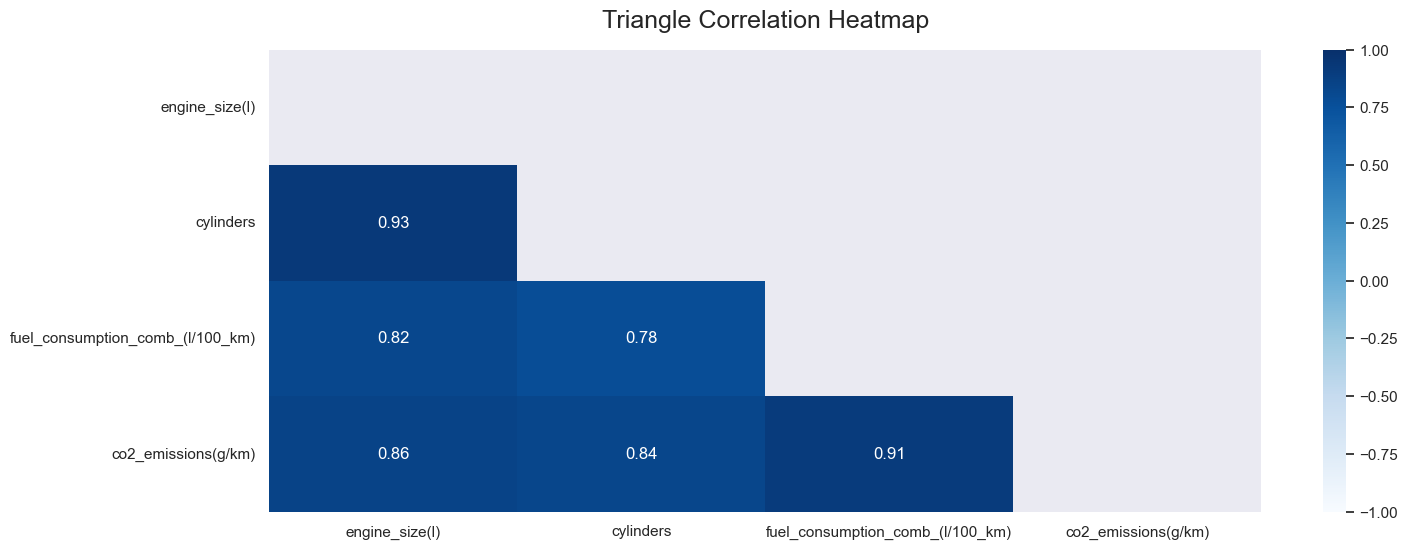

In [160]:

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(cars.corr(), dtype=np.bool))
heatmap = sns.heatmap(cars.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [161]:
corr_val = cars[['fuel_consumption_comb_(l/100_km)','co2_emissions(g/km)']].corr()['fuel_consumption_comb_(l/100_km)'][1].round(2)
print('The correlation between fuel consumption and CO2 emissions  = {}'.format(corr_val))

The correlation between fuel consumption and CO2 emissions  = 0.91


## As we can see, the correlation between these values is very strong. This means that CO2 emissions directly depend on the amount of fuel consumed.


### 4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
and
### 5. What are the average CO2 emissions for all vehicles? 


In [162]:
fuel_co2 = cars.groupby(['vehicle_class'])\
			   .agg({'fuel_consumption_comb_(l/100_km)':'mean','co2_emissions(g/km)':'mean',
                     'engine_size(l)':'mean','model':'count'})\
			   .reset_index().round(2)\
               .rename(columns= {'model':'count'})\
               .round(1).sort_values('co2_emissions(g/km)',ascending=True)


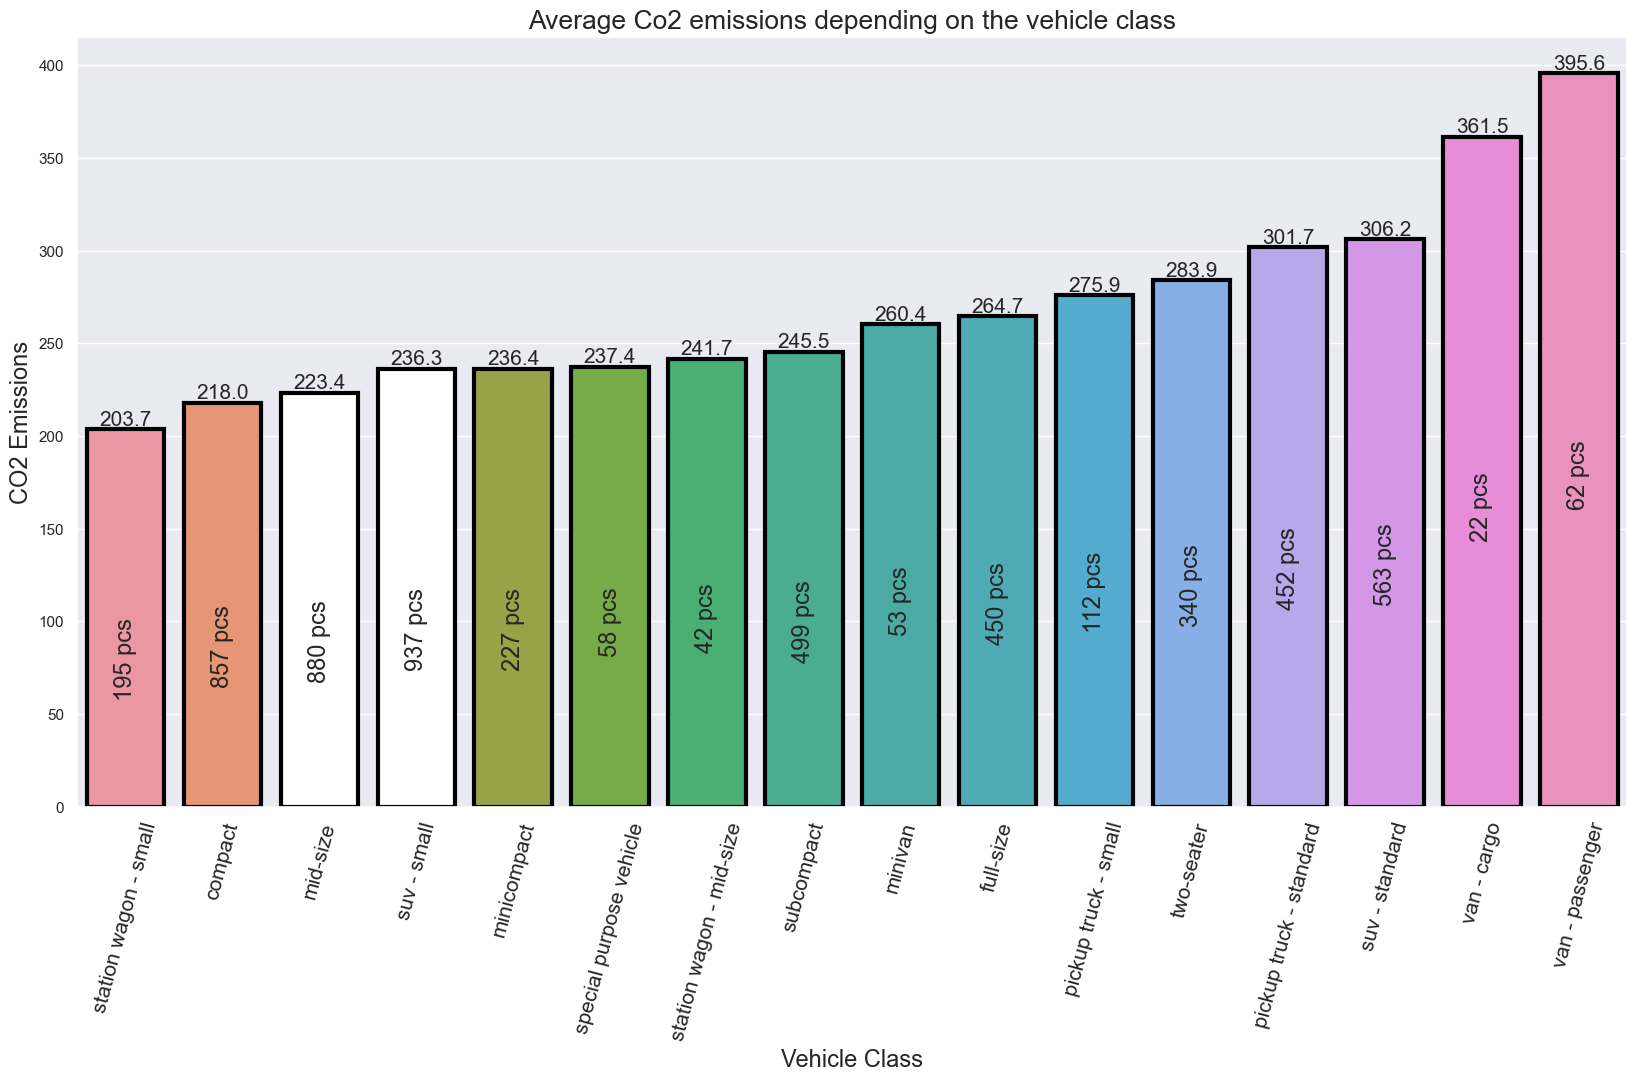

In [163]:
plt.figure(figsize=(20, 10))

plt.xticks(rotation=75, fontsize=15); 
plt.title('Average Co2 emissions depending on the vehicle class',fontsize = 19)

ax = sns.barplot(data = fuel_co2, x = 'vehicle_class', y='co2_emissions(g/km)',edgecolor='black',linewidth=3)

plt.xlabel('Vehicle Class',fontsize = 17)
plt.ylabel('CO2 Emissions',fontsize = 17)

pos2 = df.index.get_loc(2)
pos11 = df.index.get_loc(3)

ax.patches[pos2].set_facecolor('w')
ax.patches[pos11].set_facecolor('w')


patch_h = [patch.get_height() for patch in ax.patches]

for i in ax.patches:
        plt.annotate(format(i.get_height(),".1f"), xy=(i.get_x() + i.get_width() / 2,
                                          i.get_height()),ha='center',va='bottom',rotation=0,fontsize = 15)
c = list(fuel_co2['count'])
for i,item in zip(ax.patches,c):
    plt.annotate(str(item)+' pcs', xy=(i.get_x() + i.get_width() /2,
                                          i.get_height()/2), ha='center', va='top',rotation=90,fontsize = 17 )
plt.show()

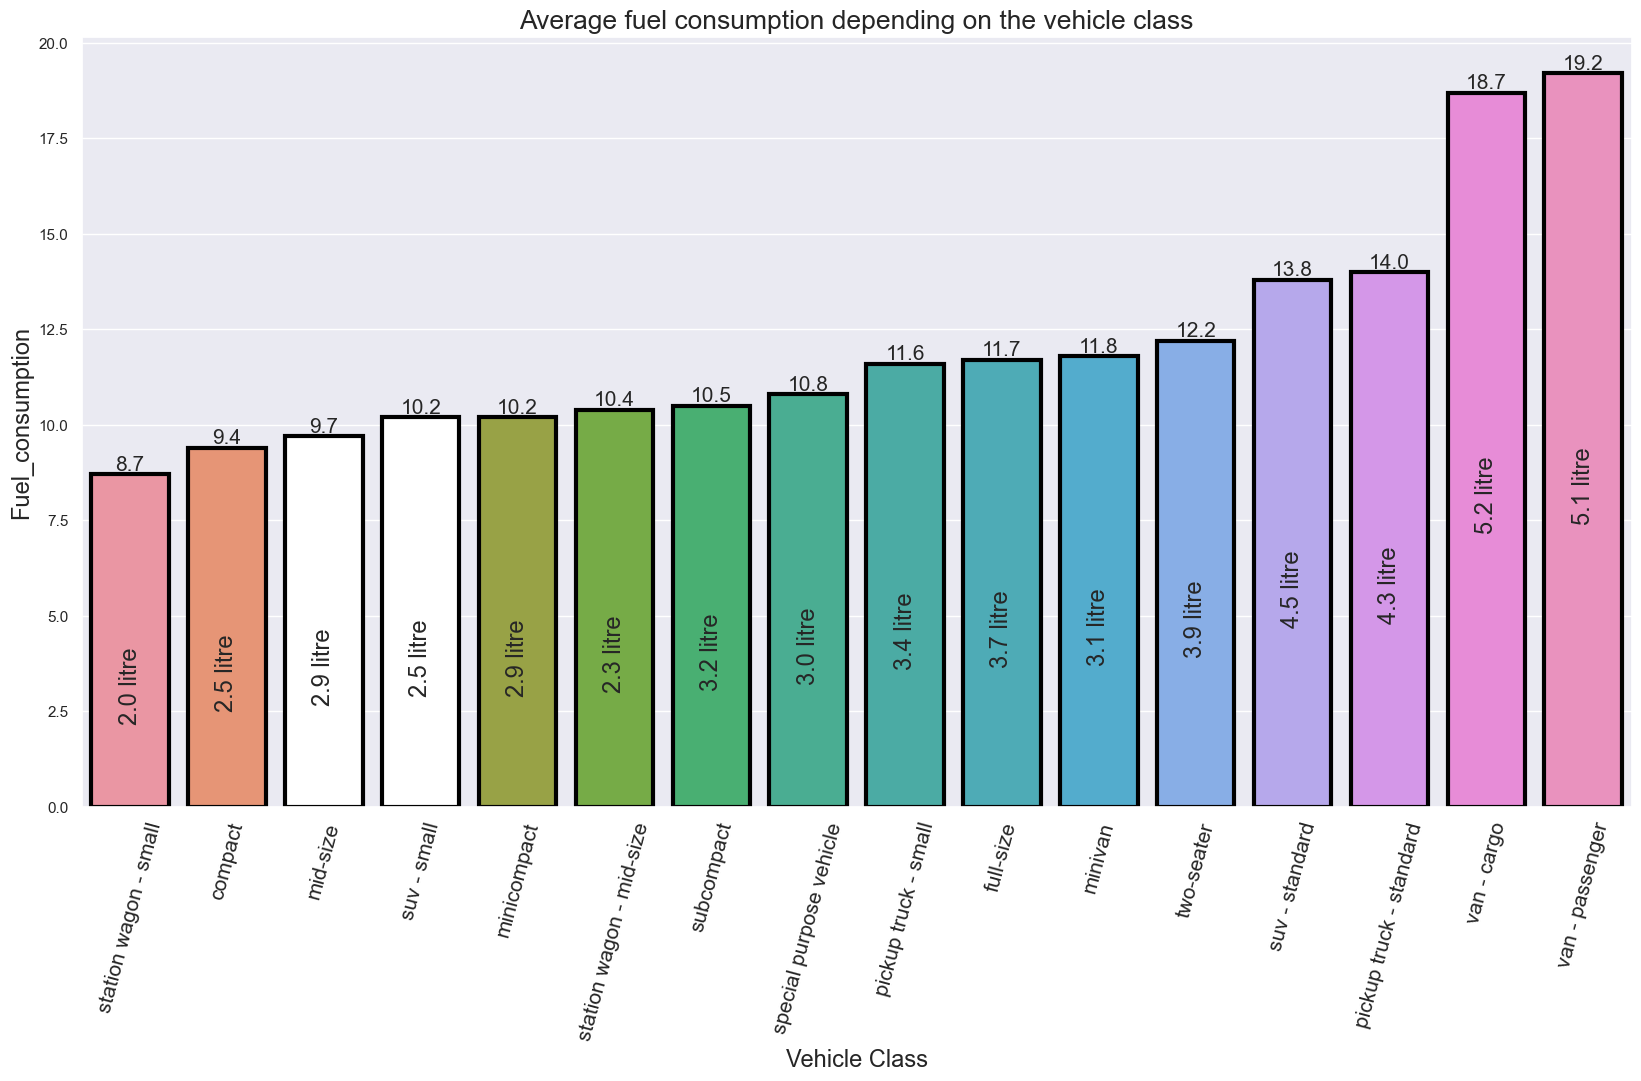

In [164]:
plt.figure(figsize=(20, 10))

plt.xticks(rotation=75, fontsize=15); 
plt.title('Average fuel consumption depending on the vehicle class',fontsize = 19)

ax = sns.barplot(data = fuel_co2.sort_values('fuel_consumption_comb_(l/100_km)',ascending= True), x = 'vehicle_class', y='fuel_consumption_comb_(l/100_km)',edgecolor='black',linewidth=3)

plt.xlabel('Vehicle Class',fontsize = 17)
plt.ylabel('Fuel_consumption',fontsize = 17)

pos2 = df.index.get_loc(2)
pos11 = df.index.get_loc(3)

ax.patches[pos2].set_facecolor('w')
ax.patches[pos11].set_facecolor('w')


patch_h = [patch.get_height() for patch in ax.patches]

for i in ax.patches:
        plt.annotate(format(i.get_height(),".1f"), xy=(i.get_x() + i.get_width() / 2,
                                          i.get_height()),ha='center',va='bottom',rotation=0,fontsize = 15)
c = list(fuel_co2['engine_size(l)'])
for i,item in zip(ax.patches,c):
    plt.annotate(str(item)+' litre ', xy=(i.get_x() + i.get_width() /2,
                                          i.get_height()/2), ha='center', va='top',rotation=90,fontsize = 17 )
plt.show()

## As we can see from the graph, CO2 emissions are slightly higher for small SUV class cars, although their average engine capacity is higher.

In [165]:
mean_CO2 = cars['co2_emissions(g/km)'].mean().round(0)
print("The average CO2 emissions for all vehicles = {}".format(int(mean_CO2)))

The average CO2 emissions for all vehicles = 252


### Average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?

In [166]:

cars_less_2l = cars[cars['engine_size(l)'] <= 2]
cars_less_2l_mean= cars_less_2l.groupby(['engine_size(l)'])\
 				 .agg({'fuel_consumption_comb_(l/100_km)':'mean','co2_emissions(g/km)':'mean','model':'count'})\
				 .reset_index().round(2).sort_values('engine_size(l)')


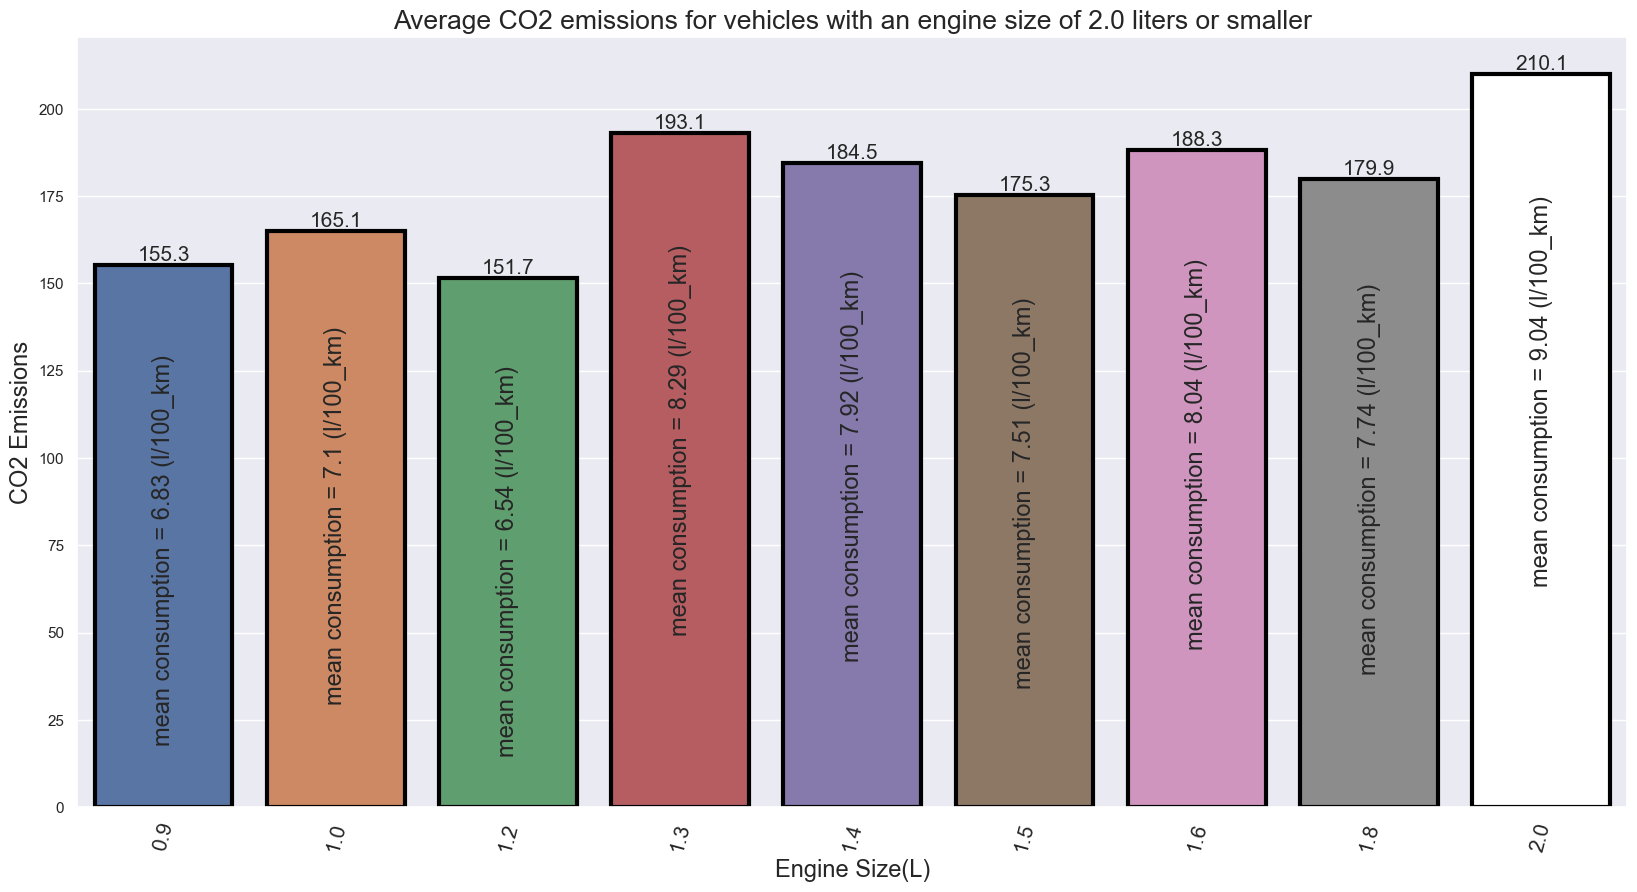

In [167]:
plt.figure(figsize=(20, 10))

plt.xticks(rotation=75, fontsize=15); 
plt.title('Average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller',fontsize = 19)

ax = sns.barplot(data = cars_less_2l_mean, x = 'engine_size(l)', y='co2_emissions(g/km)',edgecolor='black',linewidth=3)

plt.xlabel('Engine Size(L)',fontsize = 17)
plt.ylabel('CO2 Emissions',fontsize = 17)

pos8 = df.index.get_loc(8)

ax.patches[pos8].set_facecolor('w')


patch_h = [patch.get_height() for patch in ax.patches]

for i in ax.patches:
        plt.annotate(format(i.get_height(),".1f"), xy=(i.get_x() + i.get_width() / 2,
                                          i.get_height()),ha='center',va='bottom',rotation=0,fontsize = 15)
c = list(cars_less_2l_mean['fuel_consumption_comb_(l/100_km)'])
for i,item in zip(ax.patches,c):
    plt.annotate('mean consumption = '+str(item)+' (l/100_km)', xy=(i.get_x() + i.get_width() /2,
                                          i.get_height()/1.2), ha='center', va='top',rotation=90,fontsize = 17 )
plt.show()

As we can see from the barplot above that CO2 emissions for cars with a two-liter engine are 210 g/km, this is the highest figure for cars with a 2-liter engine and below. From this graph, the second largest indication will be for a 1.3-liter engine, of course, here you need to look at the cars themselves and what kind of environmental class they are.

### From this data, you can get much more information than there is in the task, so the question is: What other ideas do you have? I would give more complete information on this data set.

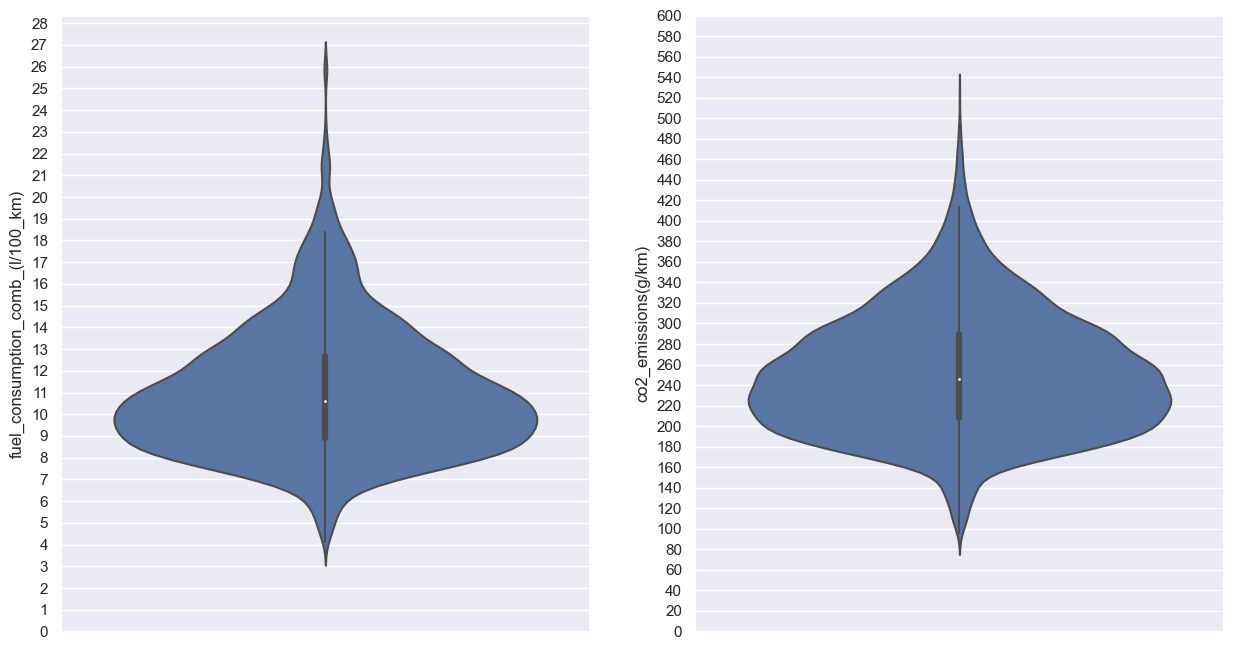

In [168]:
fig, axes = plt.subplots(1,2,  figsize=(15,8))
sns.violinplot(y=cars['fuel_consumption_comb_(l/100_km)'],ax= axes[0]);
sns.violinplot(y=cars['co2_emissions(g/km)'],ax= axes[1]);
axes[0].set_yticks(np.linspace(-0, 28, 29))

axes[1].set_yticks(np.linspace(-0, 600, 31))
plt.show()

We saw that the emissions are mostly distributed between 160 and 340 g/l and the fuel consumption distribution is from 7 to 15 =l/100km.

### I would look at which is the most eco-friendly brand of cars and which cars have the highest CO2 and the lowest.

In [169]:
cars[cars['co2_emissions(g/km)'] <= 100]

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_comb_(l/100_km),co2_emissions(g/km)
3824,hyundai,ioniq blue,full-size,1.6,4,am6,Regular,4.1,96
6949,hyundai,ioniq,full-size,1.6,4,am6,Regular,4.2,99


In [170]:
cars[cars['co2_emissions(g/km)'] >= 470]

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_comb_(l/100_km),co2_emissions(g/km)
349,ford,e350 wagon,van - passenger,6.8,10,a5,Regular,21.2,488
2971,mercedes-benz,amg g 65,suv - standard,6.0,12,as7,Premium,21.4,476
4509,bugatti,chiron,two-seater,8.0,16,am7,Premium,22.2,522
5126,mercedes-benz,amg g 65,suv - standard,6.0,12,a7,Premium,20.3,473
6045,lamborghini,aventador coupe,two-seater,6.5,12,am7,Premium,21.5,487
6046,lamborghini,aventador roadster,two-seater,6.5,12,am7,Premium,21.7,493
7058,lamborghini,aventador coupe,two-seater,6.5,12,am7,Premium,21.4,485


Sports cars have high fuel consumption and CO2 emissions. It can be seen that the number of cylinders in these engines starts from 10 and above, and the engine capacity starts from 6 liters.



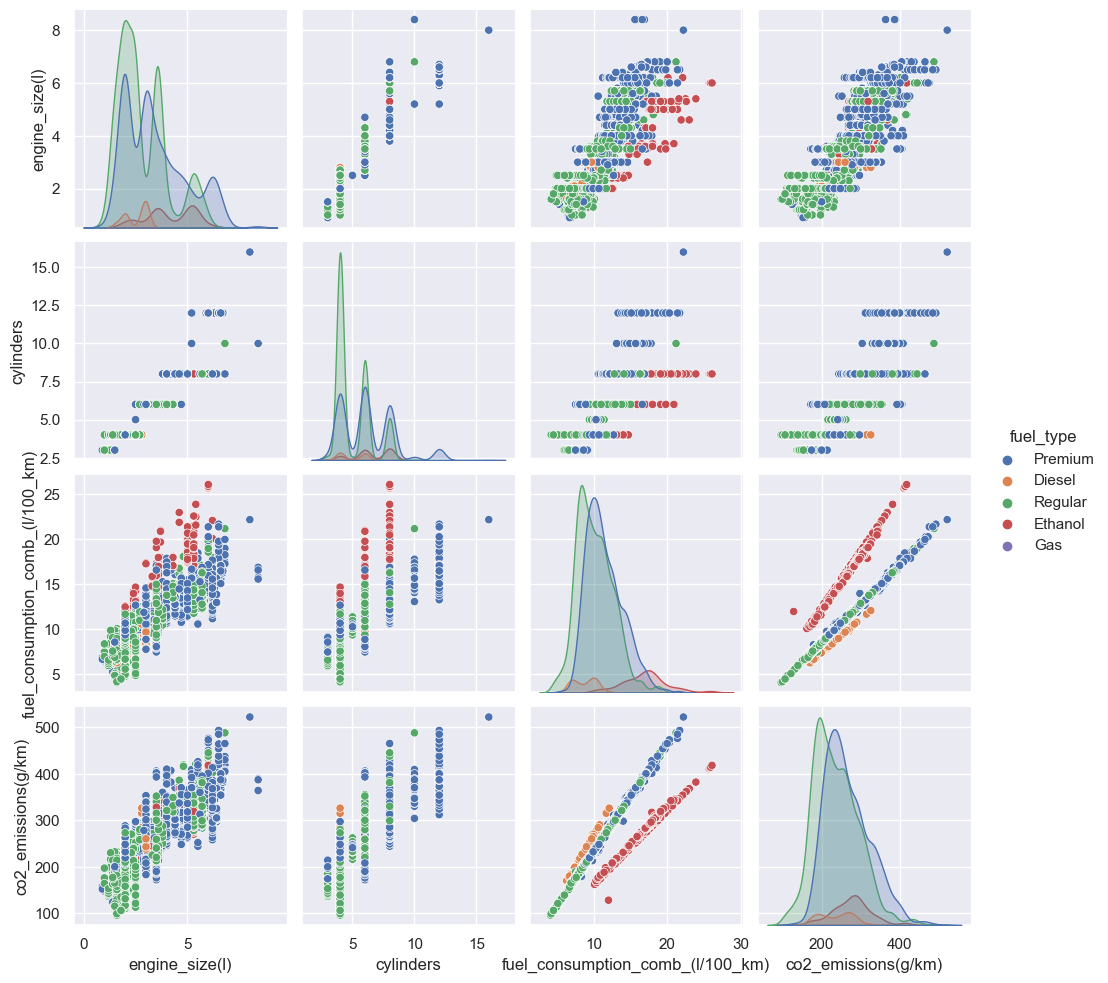

In [171]:
sns.pairplot(cars,hue ='fuel_type');

As the number of cylinders increase, the CO2 emissions increase
Cars with 8 and less than 8 cylinders prefer using Fuel Type regular which result in less emissions of CO2
Fuel Type Premium gasoline results in more CO2 emissions than the other

Bugatti have a  emit the most CO2 per car

Model Bugatti Chiron is amongst the most CO2 emitting car model

 Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2

Cars using Fuel Type Ethanol are emitting the most CO2

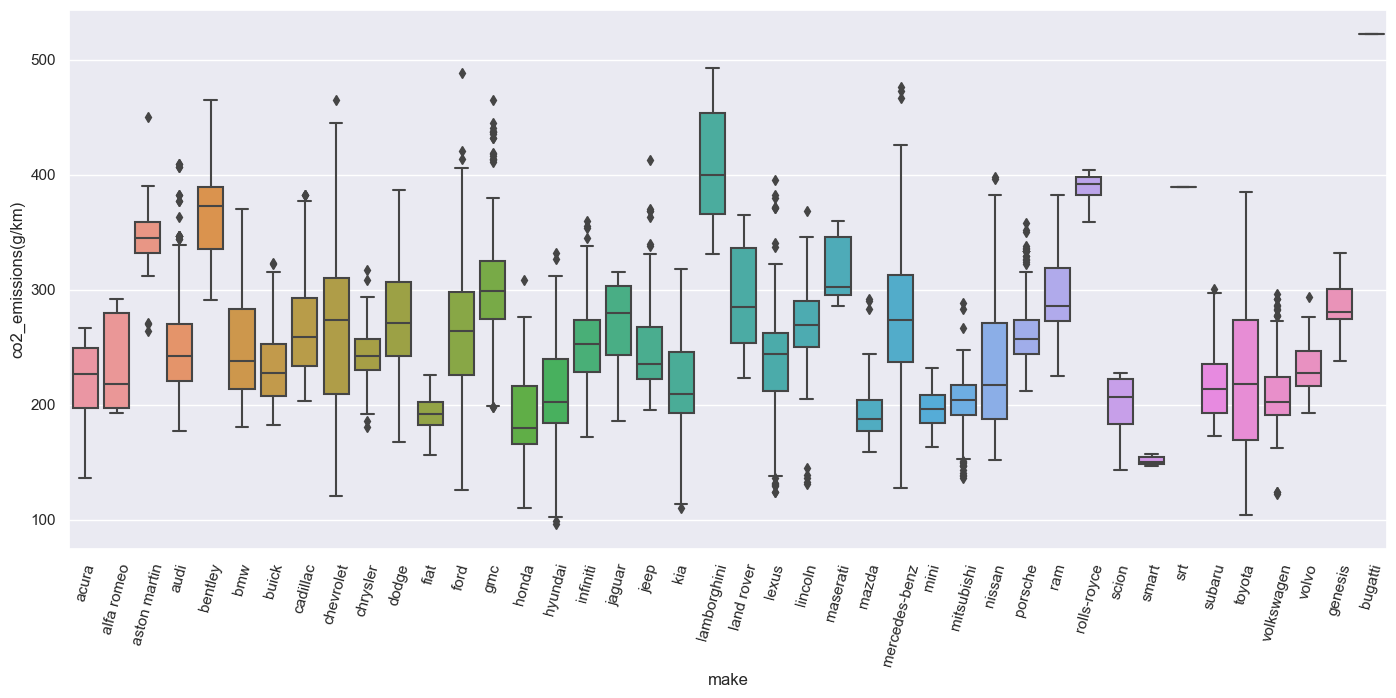

In [172]:
plt.figure(figsize = (17,7))
sns.boxplot(x="make", y='co2_emissions(g/km)', data=cars)
plt.xticks(rotation = 75)
plt.show()

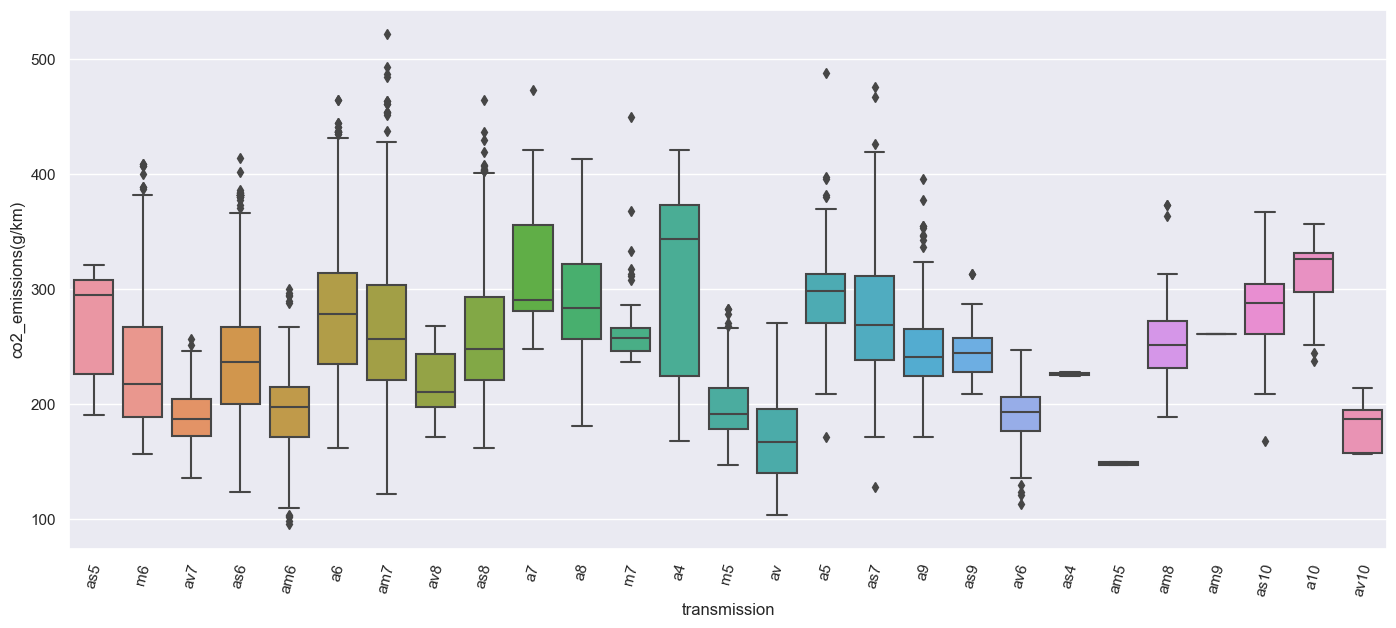

In [173]:
plt.figure(figsize = (17,7))
sns.boxplot(x="transmission", y='co2_emissions(g/km)', data=cars)
plt.xticks(rotation = 75)
plt.show()

In [174]:
import plotly.express as px
fig = px.pie(cars['cylinders'].value_counts().reset_index(), values='cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()


We can still try to generalize the data, for example, the gearbox can be divided into a smaller number of groups, for example manual, automatic, variator and automatic with the possibility of manual adjustment. Also try to keep track of which class the brands are conditionally sports, family and so on. There are a lot of opportunities to play with data, but basically it will all be needed, for example, to build forecasts of co2 emissions.

## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## A note on SQL
You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

It is also important to note that the database used in this challenge is a slightly different version (SQL Server) from the one used in the Introduction to SQL course (PostgreSQL). You might notice that the keyword **LIMIT** does not exist in SQL Server.

In [175]:
SELECT * 
FROM products;

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [176]:
SELECT * FROM brands;

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [177]:
SELECT * FROM categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


## What is the most expensive item your company sells? 
The least expensive? 

In [178]:
select * from products
where list_price in (select MAX(list_price) from products) 
OR list_price in(select MIN(list_price) from products)

,product_id,product_name,brand_id,category_id,model_year,list_price
0,155,Trek Domane SLR 9 Disc - 2018,9,7,2018,11999.99
1,263,Strider Classic 12 Balance Bike - 2018,6,1,2018,89.99


### As we can see, the smallest price is 90 and the maximum is 12 thousand dollars

## How many different products of each category does your company sell?

In [179]:
select c.category_name, count(p.category_id) as product_count 
from categories as c
inner  join products as p
on c.category_id = p.category_id
group by c.category_name
order by product_count desc

,category_name,product_count
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30
5,Electric Bikes,24
6,Cyclocross Bicycles,10


## What are the top three brands with the highest average list price? The top three categories?

In [180]:
select top 3 b.brand_name, round(avg(p.list_price),0) as mean_price 
from brands as b
inner  join products as p
on b.brand_id = p.category_id
group by b.brand_name
order by mean_price desc


,brand_name,mean_price
0,Ritchey,3282
1,Sun Bicycles,3175
2,Pure Cycles,2543


In [181]:
select  b.brand_name, round(sum(p.list_price),0) as sum_price 
from brands as b
inner  join products as p
on b.brand_id = p.category_id
group by b.brand_name
order by sum_price desc


,brand_name,sum_price
0,Sun Bicycles,190521
1,Strider,98985
2,Ritchey,78760
3,Heller,56972
4,Pure Cycles,25428
5,Haro,20464
6,Electra,16979
